In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

# Data Preprocessing

In [2]:
df=pd.read_csv("fake.csv")

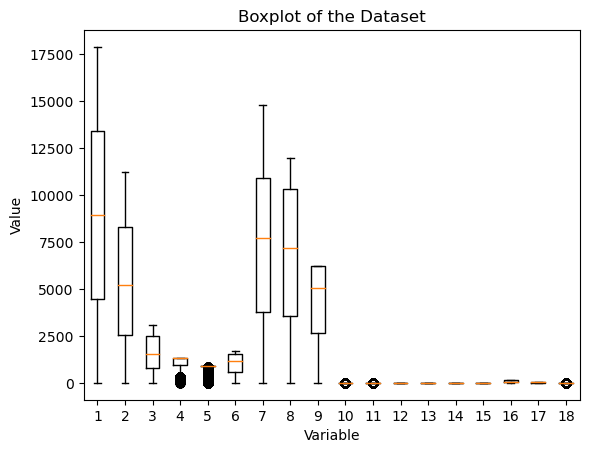

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset in a pandas DataFrame called 'df'

# Create a boxplot
plt.boxplot(df.values)

# Set the title and labels
plt.title("Boxplot of the Dataset")
plt.xlabel("Variable")
plt.ylabel("Value")

# Display the plot
plt.show()


In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

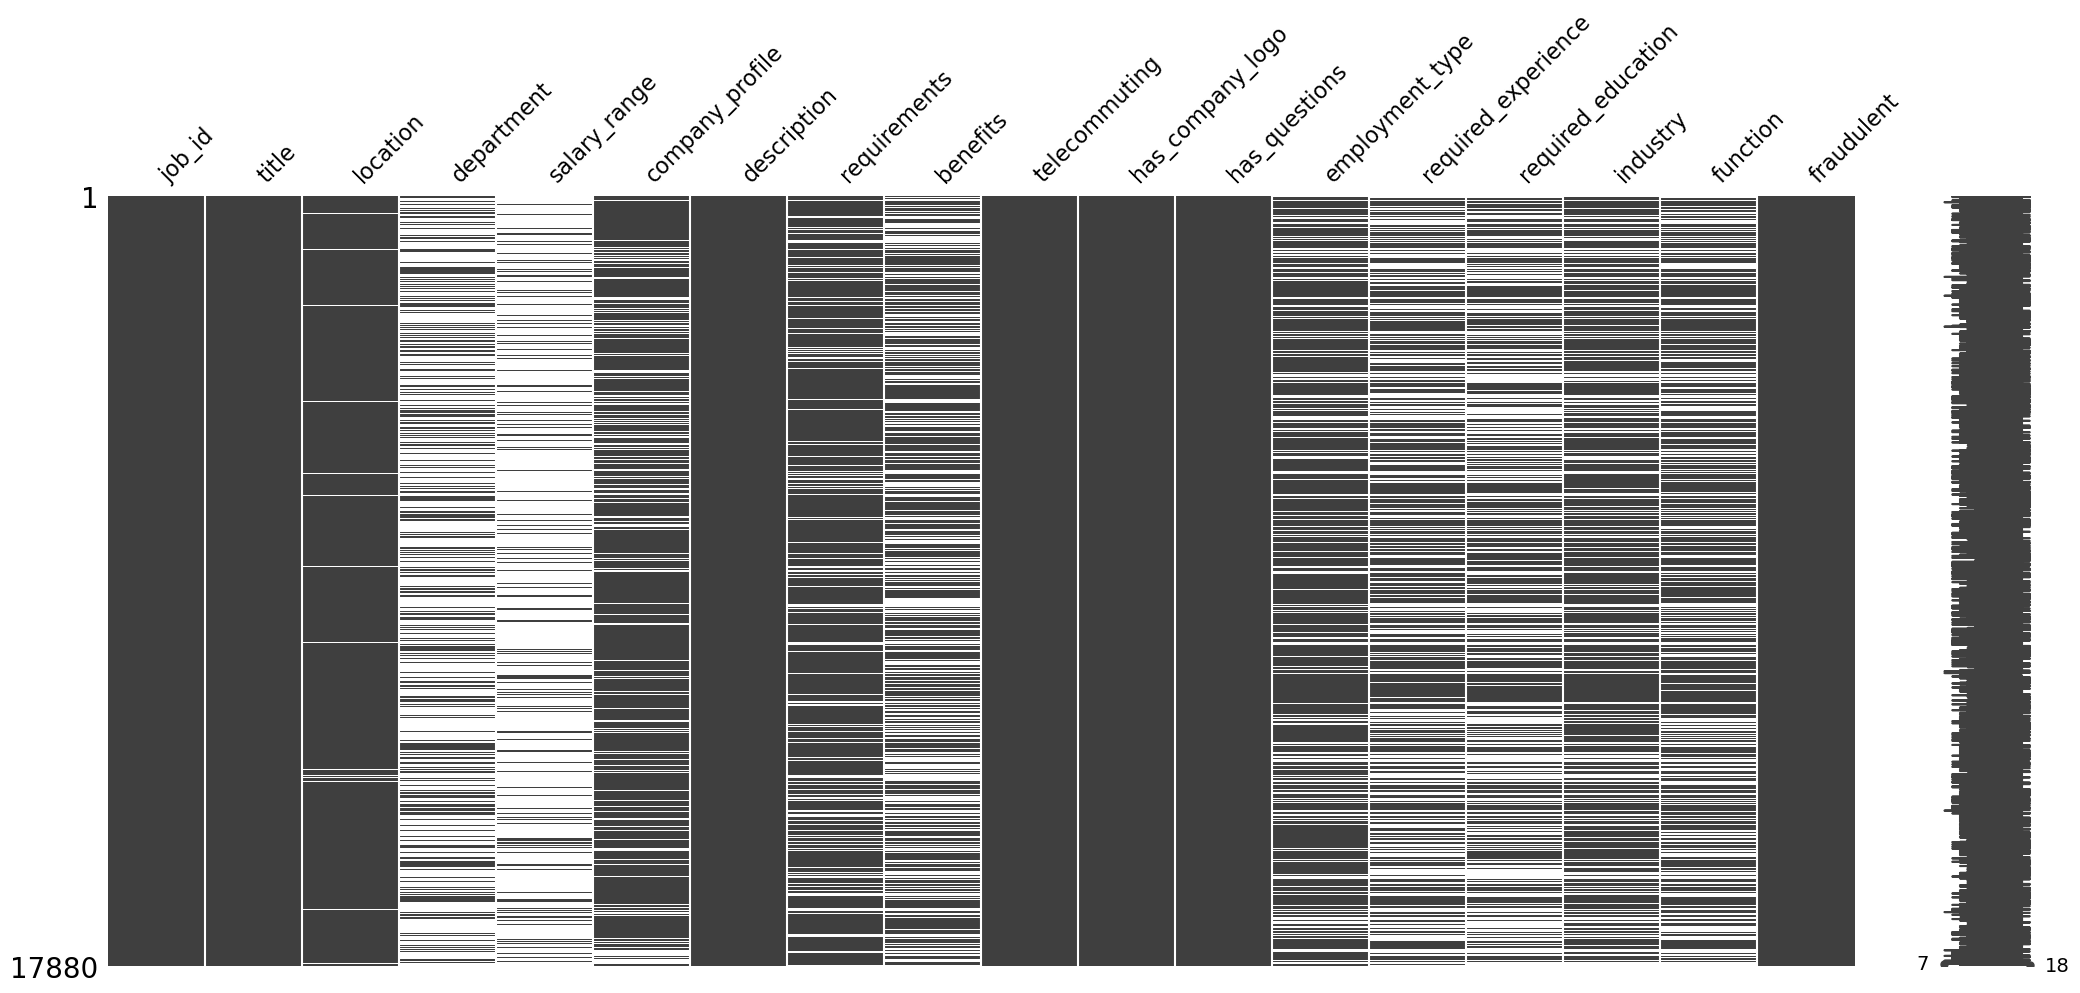

In [5]:
msno.matrix(df)
plt.show()

Lot of Null Values

In [6]:
#filling null values, 'Not Applicable' and 'Unspecified' with 'Not Specified'
df.fillna('Not Specified', inplace=True)
df = df.replace(['Not Applicable','Unspecified'],'Not Specified')

In [7]:
df = df.drop(columns = ['job_id'])

In [8]:
#Label counts for each attribute
labelcountlist = []
for x in df.columns:
        labelcountlist.append((len(df[x].unique())))
labelcount = pd.DataFrame({'Attribute': df.columns, 'Count': labelcountlist})
print(labelcount)

              Attribute  Count
0                 title  11231
1              location   3106
2            department   1338
3          salary_range    875
4       company_profile   1710
5           description  14802
6          requirements  11969
7              benefits   6206
8         telecommuting      2
9      has_company_logo      2
10        has_questions      2
11      employment_type      6
12  required_experience      7
13   required_education     13
14             industry    132
15             function     38
16           fraudulent      2


In [9]:
df.head(20)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Specified,Not Specified,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Specified,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Not Specified,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,Accounting Clerk,"US, MD,",Not Specified,Not Specified,Not Specified,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,0,0,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",Not Specified,Not Specified,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0
8,HP BSM SME,"US, FL, Pensacola",Not Specified,Not Specified,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Not Specified,0,1,1,Full-time,Associate,Not Specified,Information Technology and Services,Not Specified,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",Not Specified,Not Specified,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Specified,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


# EDA


telecommuting
----------
[0, 1]

0    17113
1      767
Name: telecommuting, dtype: int64


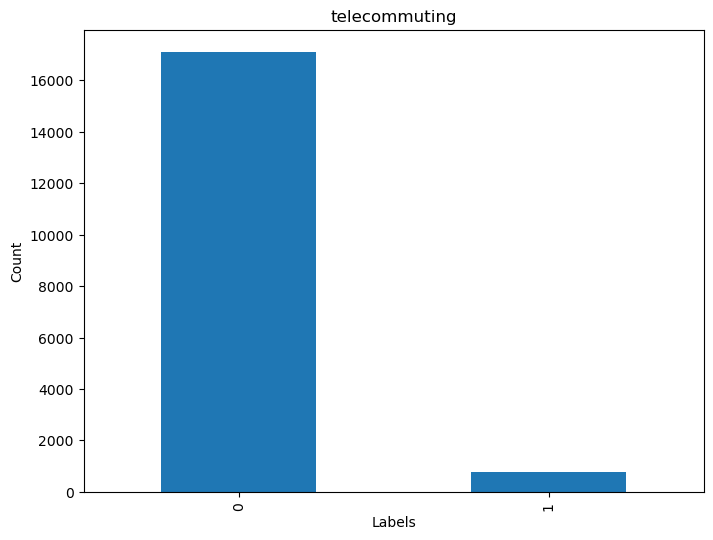


has_company_logo
----------
[1, 0]

1    14220
0     3660
Name: has_company_logo, dtype: int64


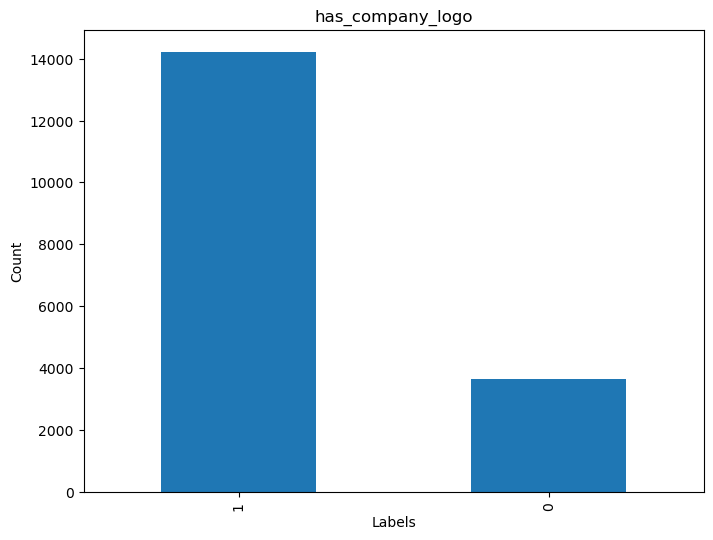


has_questions
----------
[0, 1]

0    9088
1    8792
Name: has_questions, dtype: int64


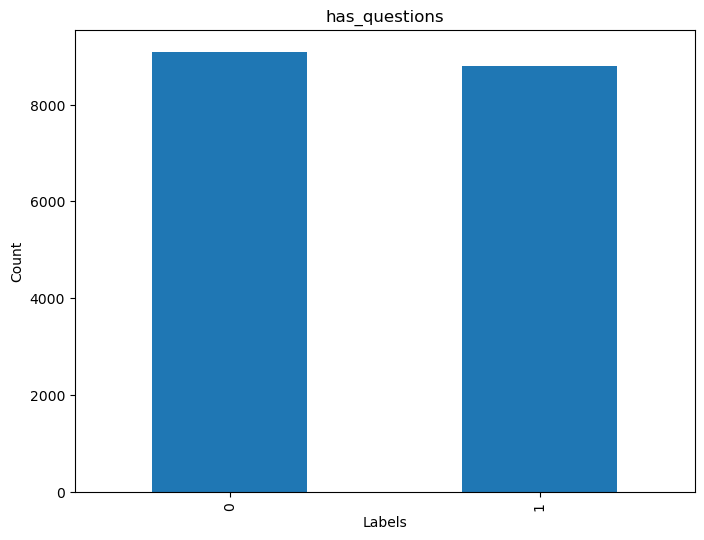


employment_type
----------
['Other', 'Full-time', 'Not Specified', 'Part-time', 'Contract', 'Temporary']

Full-time        11620
Not Specified     3471
Contract          1524
Part-time          797
Temporary          241
Other              227
Name: employment_type, dtype: int64


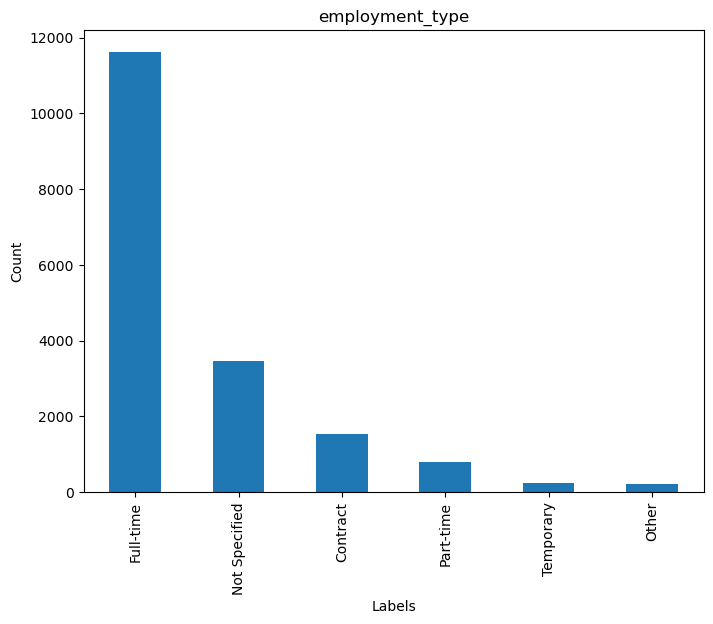


required_experience
----------
['Internship', 'Not Specified', 'Mid-Senior level', 'Associate', 'Entry level', 'Executive', 'Director']

Not Specified       8166
Mid-Senior level    3809
Entry level         2697
Associate           2297
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64


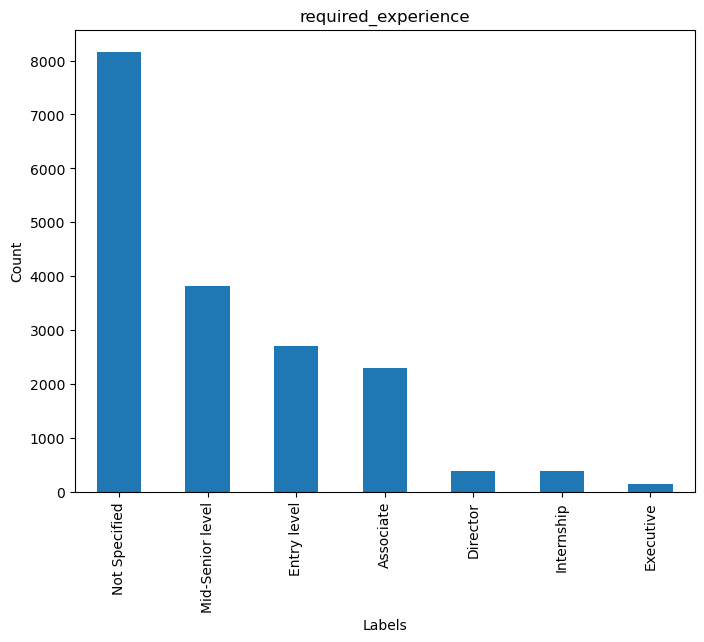


required_education
----------
['Not Specified', "Bachelor's Degree", "Master's Degree", 'High School or equivalent', 'Some College Coursework Completed', 'Vocational', 'Certification', 'Associate Degree', 'Professional', 'Doctorate', 'Some High School Coursework', 'Vocational - Degree', 'Vocational - HS Diploma']

Not Specified                        9502
Bachelor's Degree                    5145
High School or equivalent            2080
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64


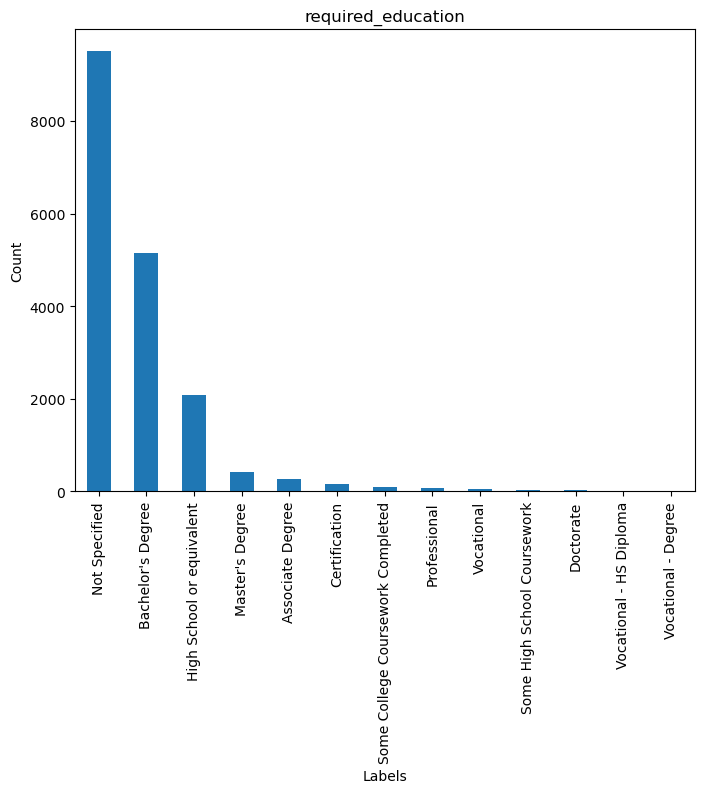


function
----------
['Marketing', 'Customer Service', 'Not Specified', 'Sales', 'Health Care Provider', 'Management', 'Information Technology', 'Other', 'Engineering', 'Administrative', 'Design', 'Production', 'Education', 'Supply Chain', 'Business Development', 'Product Management', 'Financial Analyst', 'Consulting', 'Human Resources', 'Project Management', 'Manufacturing', 'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance', 'General Business', 'Research', 'Accounting/Auditing', 'Art/Creative', 'Quality Assurance', 'Data Analyst', 'Business Analyst', 'Writing/Editing', 'Distribution', 'Science', 'Training', 'Purchasing', 'Legal']

Not Specified             6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Man

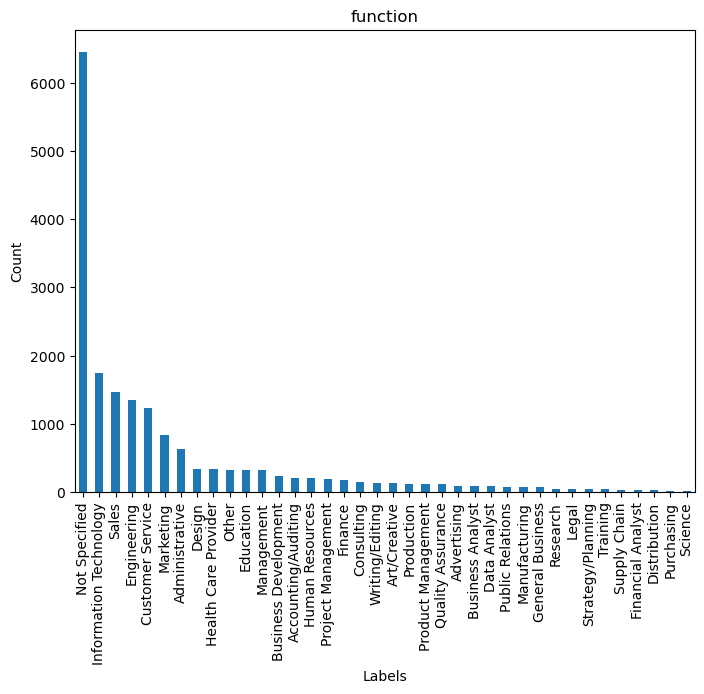


fraudulent
----------
[0, 1]

0    17014
1      866
Name: fraudulent, dtype: int64


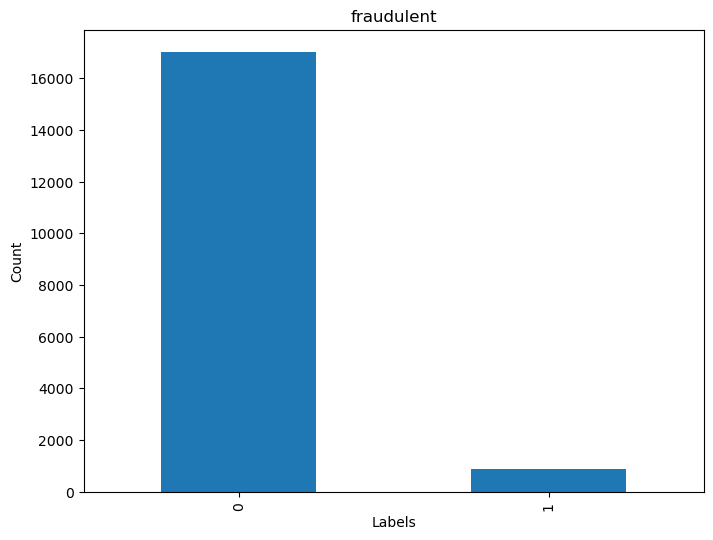

In [10]:


# Calculate the count of unique labels for each attribute
labelcount = df.nunique().reset_index()
labelcount.columns = ['Attribute', 'Count']

# Filter attributes with less than 100 unique labels
filtered_labels = labelcount[labelcount['Count'] < 100]['Attribute'].tolist()

# Store the filtered labels for comprehensible visualization
label = []

# Iterate over the filtered labels
for attr in filtered_labels:
    print('\n' + attr + '\n----------')
    unique_vals = df[attr].unique()
    print(str(list(unique_vals)) + "\n")
    print(df[attr].value_counts())
    label.append(attr)
# Plot a bar graph showing the count of each label
    plt.figure(figsize=(8, 6))
    df[attr].value_counts().plot(kind='bar')
    plt.title(attr)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.show()
    


# Conclusion

From above we can say that 
Telecommuting: The dataset contains information about telecommuting, with most job postings (approximately 95%) indicating that telecommuting is not available.

Company Logo: The majority of job postings (around 80%) have a company logo, indicating that employers often include a logo in their job postings.

Questions: The presence of questions in job postings is relatively balanced, with a similar number of postings having questions (approximately 50%) and not having questions.

Employment Type: The dataset includes various types of employment, with full-time positions being the most common (over 70% of job postings). Other types include not specified, contract, part-time, temporary, and other.

Required Experience: The required experience for job postings varies, with a significant portion (around 40%) not specifying any particular experience level. The remaining postings indicate different levels, such as mid-senior level, entry level, associate
    director, internship, and executive.

Required Education: The required education for job postings is diverse, with a considerable number (around 50%) not specifying any specific education requirement. Other education levels include bachelor's degree, high school or equivalent, master's degree, associate degree, certification, and various other categories.

Function: The dataset covers a wide range of job functions, with many postings (around 40%) not specifying a particular function. The most common functions include information technology, sales, engineering, customer service, marketing, and administrative.

Fraudulent: A small portion of the job postings (approximately 5%) are marked as fraudulent, suggesting that caution should be exercised when dealing with such postings.

# NLP

In [5]:
import spacy
import nltk
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import metrics


In [12]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [13]:
#Remove stopword
nltk.download('stopwords')
stop = stopwords.words()
sym = "!@#$%^&*+-={}[]|\"':;<>,.?/`~()_" #SYMBOLS TO BE REMOVED
listsym = ([*sym])
listsym.append("'")
listsym.append('"')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [14]:
string_labels = ['company_profile','description','requirements','benefits']
for label in string_labels:
    df[label] =  df[label].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    for j in range(df.shape[0]):
        for i in listsym:
            df.at[j,label] = df.at[j,label].replace(i,"")

In [15]:
# checking Real and Fake Job words
fraudjobs_text = df[df['fraudulent'] == 1]['title']
actualjobs_text = df[df['fraudulent'] == 0]['title']


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


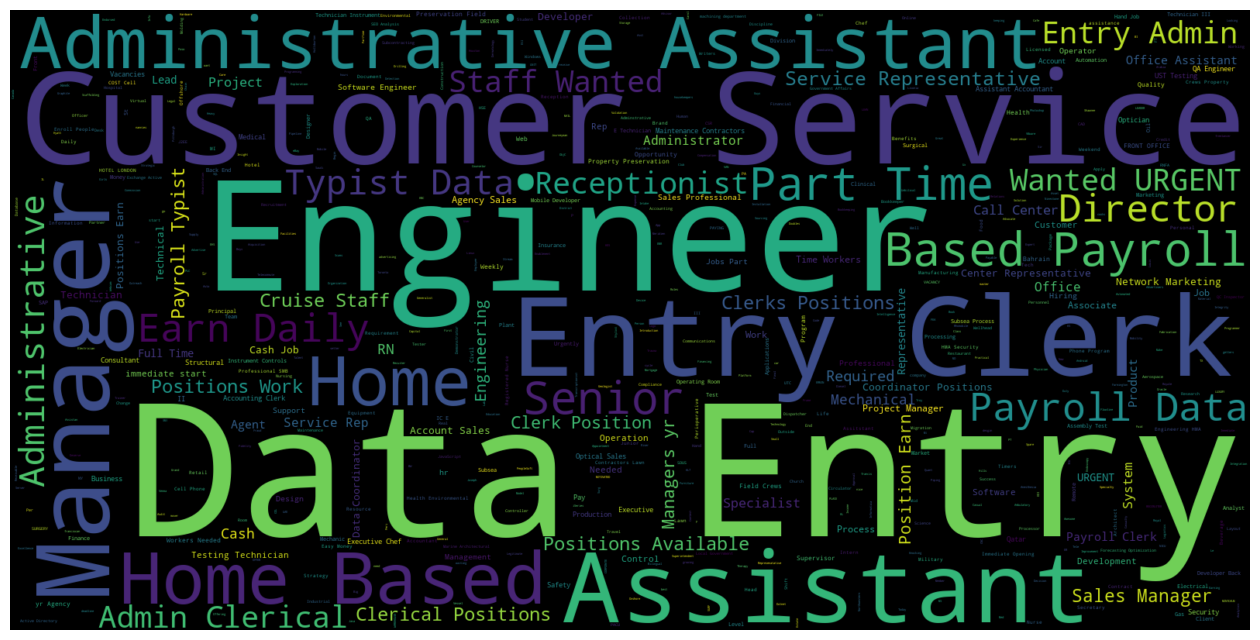

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the stopwords
STOPWORDS = set(stopwords.words('english'))

# Create the word cloud
plt.figure(figsize=(16, 14))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(fraudjobs_text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

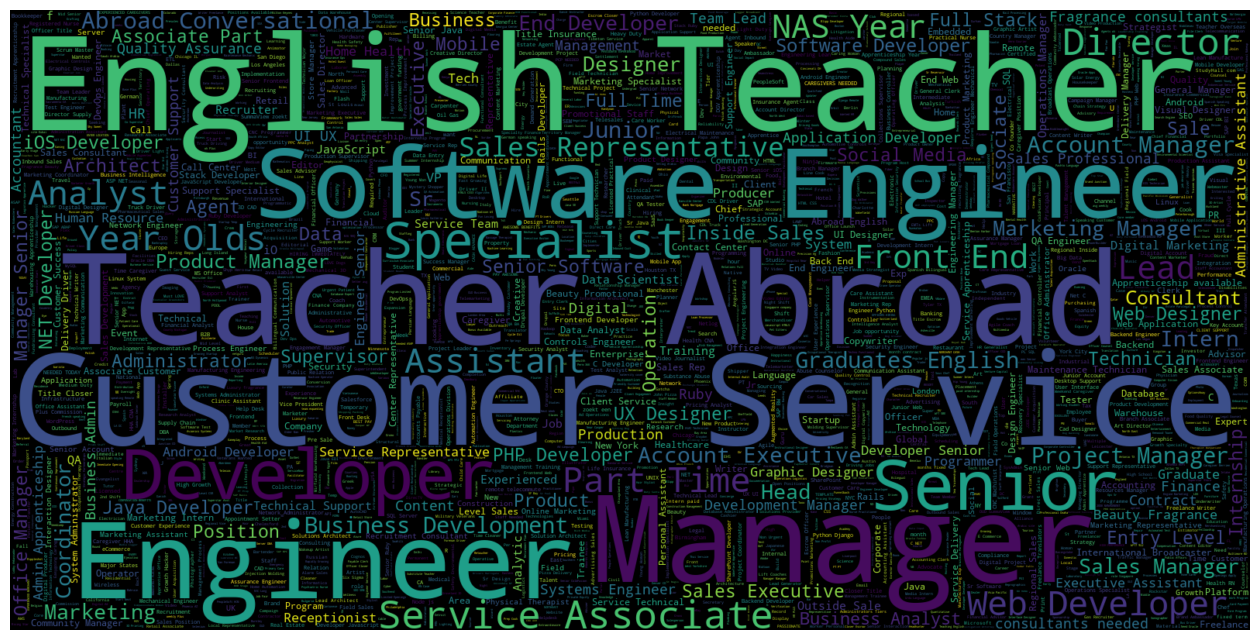

In [17]:
# Create the word cloud
plt.figure(figsize=(16, 14))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(actualjobs_text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
realcount = (df['fraudulent'] == 0).sum()  # Number of real applications
fakecount = (df['fraudulent'] == 1).sum()  # Number of fake applications

# FUNCTION TO CALCULATE THE NUMBER OF NOT SPECIFIED ENTRIES IN VARIOUS ATTRIBUTES ALONG WITH THE RATIO OF NOT SPECIFIED TO REAL AND FAKE APPLICATIONS

def not_specified(labelname, name):
    df_real = df[df['fraudulent'] == 0][labelname]
    not_specreal = (df_real == 'Not Specified').sum()
    print(name + '\n-----------------\n\nREAL\n-----------')
    print(f"Number of Real applications that have not specified {name} = {not_specreal:.0f}")
    print(f"Number of Real applications = {realcount:.0f}")
    print(f"Ratio (Not Specified Real applications / Real applications) = {not_specreal / realcount:.6f}")
    
    df_fake = df[df['fraudulent'] == 1][labelname]
    not_specfake = (df_fake == 'Not Specified').sum()
    print('\n\nFAKE\n-----------')
    print(f"Number of Fake applications that have not specified {name} = {not_specfake:.0f}")
    print(f"Number of Fake applications = {fakecount:.0f}")
    print(f"Ratio (Not Specified Fake applications / Fake applications) = {not_specfake / fakecount:.6f}")

for column in df.columns:
    not_specified(column, column.upper())
    print('\n')


TITLE
-----------------

REAL
-----------
Number of Real applications that have not specified TITLE = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified TITLE = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


LOCATION
-----------------

REAL
-----------
Number of Real applications that have not specified LOCATION = 327
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.019219


FAKE
-----------
Number of Fake applications that have not specified LOCATION = 19
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.021940


DEPARTMENT
-----------------

REAL
-----------
Number of Real applications that have not specified DEPARTMENT = 11016
Number of Real applications = 17014
Ratio (Not Specified Real applicatio

TITLE
-----------------

REAL
-----------
Number of Real applications that have not specified TITLE = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified TITLE = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


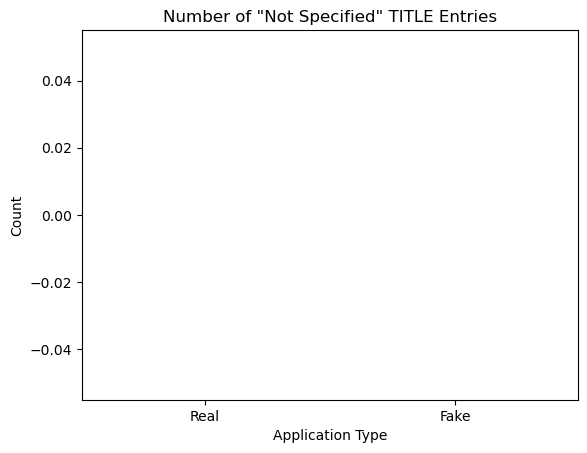



LOCATION
-----------------

REAL
-----------
Number of Real applications that have not specified LOCATION = 327
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.019219


FAKE
-----------
Number of Fake applications that have not specified LOCATION = 19
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.021940


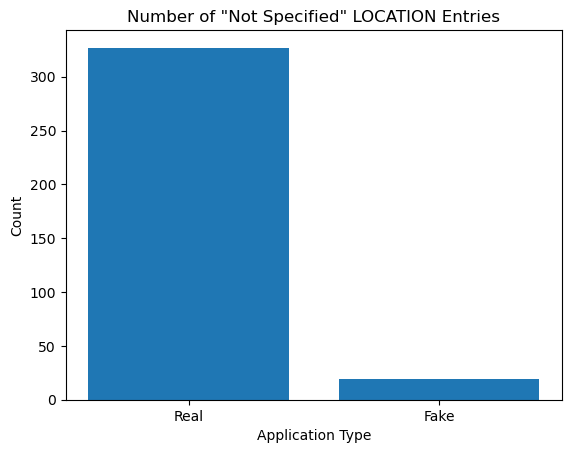



DEPARTMENT
-----------------

REAL
-----------
Number of Real applications that have not specified DEPARTMENT = 11016
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.647467


FAKE
-----------
Number of Fake applications that have not specified DEPARTMENT = 531
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.613164


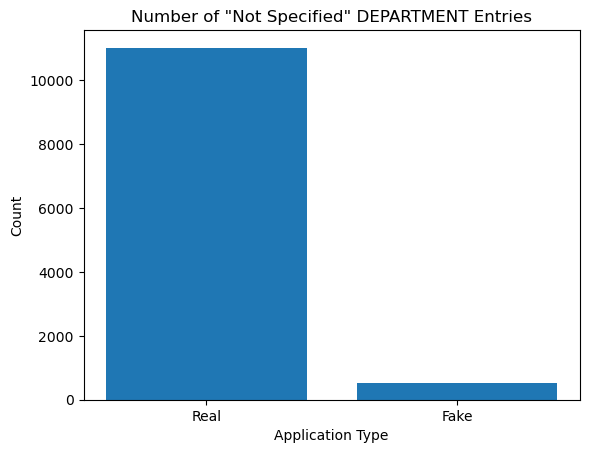



SALARY_RANGE
-----------------

REAL
-----------
Number of Real applications that have not specified SALARY_RANGE = 14369
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.844540


FAKE
-----------
Number of Fake applications that have not specified SALARY_RANGE = 643
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.742494


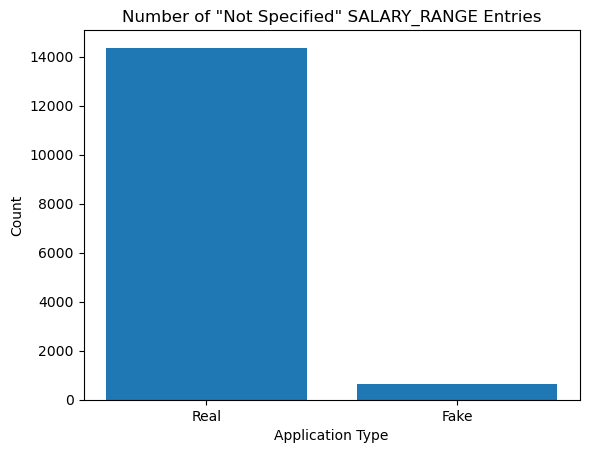



COMPANY_PROFILE
-----------------

REAL
-----------
Number of Real applications that have not specified COMPANY_PROFILE = 2721
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.159927


FAKE
-----------
Number of Fake applications that have not specified COMPANY_PROFILE = 587
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.677829


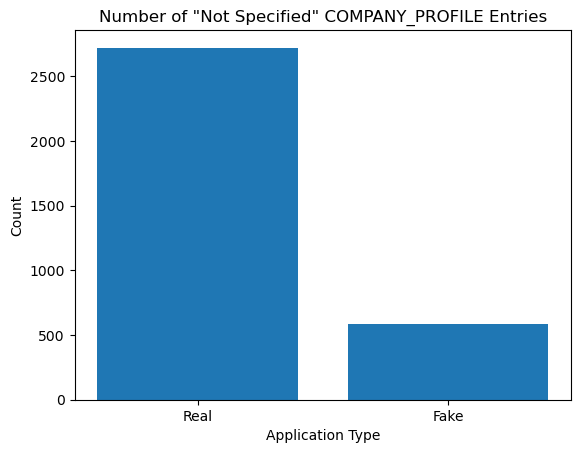



DESCRIPTION
-----------------

REAL
-----------
Number of Real applications that have not specified DESCRIPTION = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified DESCRIPTION = 1
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.001155


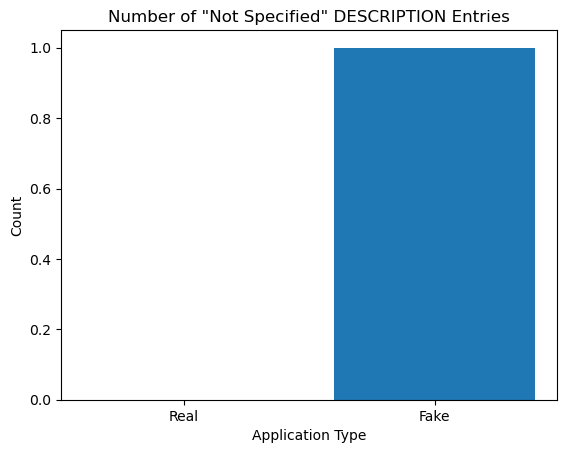



REQUIREMENTS
-----------------

REAL
-----------
Number of Real applications that have not specified REQUIREMENTS = 2541
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.149348


FAKE
-----------
Number of Fake applications that have not specified REQUIREMENTS = 154
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.177829


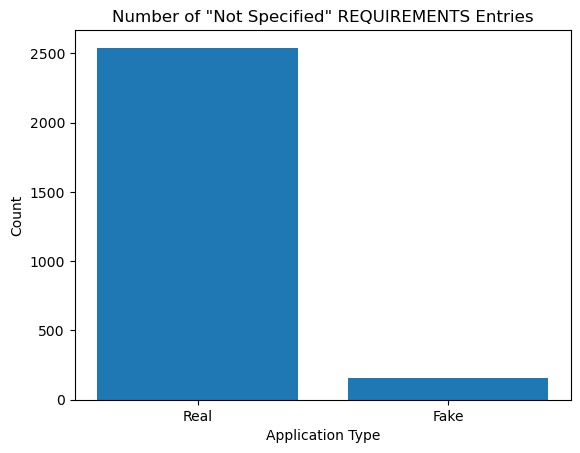



BENEFITS
-----------------

REAL
-----------
Number of Real applications that have not specified BENEFITS = 6846
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.402375


FAKE
-----------
Number of Fake applications that have not specified BENEFITS = 364
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.420323


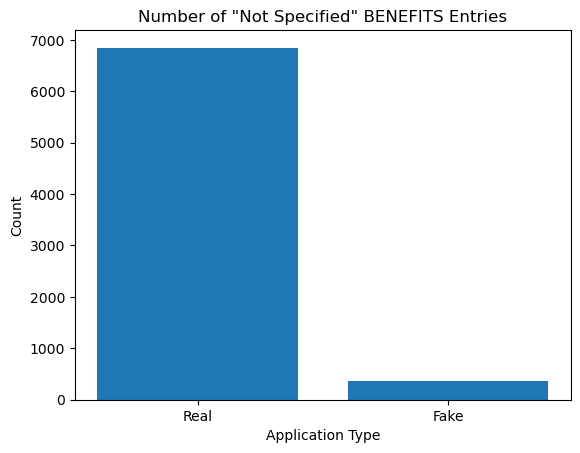



TELECOMMUTING
-----------------

REAL
-----------
Number of Real applications that have not specified TELECOMMUTING = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified TELECOMMUTING = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


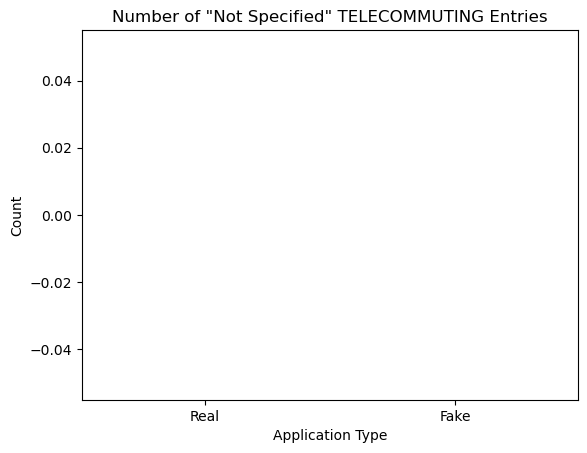



HAS_COMPANY_LOGO
-----------------

REAL
-----------
Number of Real applications that have not specified HAS_COMPANY_LOGO = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified HAS_COMPANY_LOGO = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


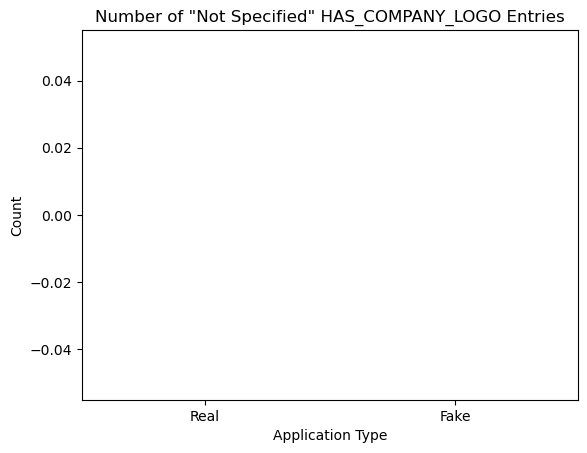



HAS_QUESTIONS
-----------------

REAL
-----------
Number of Real applications that have not specified HAS_QUESTIONS = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified HAS_QUESTIONS = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


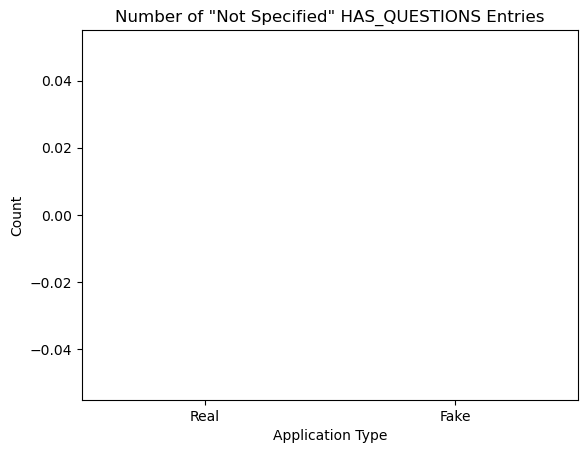



EMPLOYMENT_TYPE
-----------------

REAL
-----------
Number of Real applications that have not specified EMPLOYMENT_TYPE = 3230
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.189844


FAKE
-----------
Number of Fake applications that have not specified EMPLOYMENT_TYPE = 241
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.278291


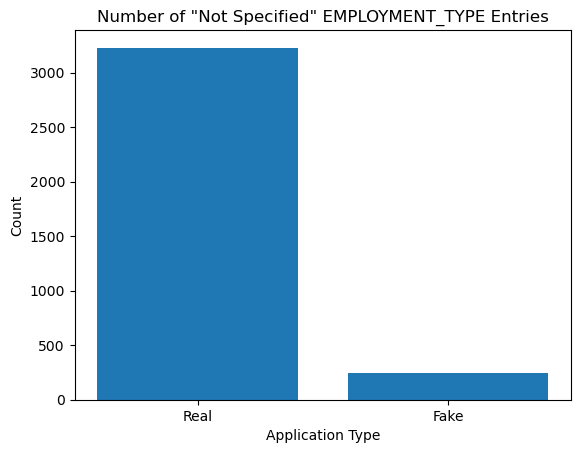



REQUIRED_EXPERIENCE
-----------------

REAL
-----------
Number of Real applications that have not specified REQUIRED_EXPERIENCE = 7671
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.450864


FAKE
-----------
Number of Fake applications that have not specified REQUIRED_EXPERIENCE = 495
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.571594


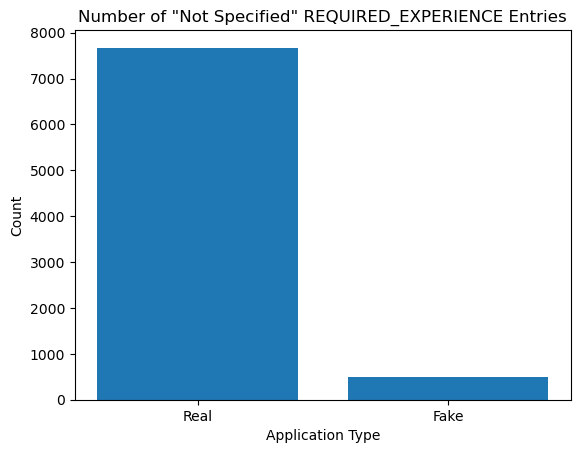



REQUIRED_EDUCATION
-----------------

REAL
-----------
Number of Real applications that have not specified REQUIRED_EDUCATION = 8990
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.528388


FAKE
-----------
Number of Fake applications that have not specified REQUIRED_EDUCATION = 512
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.591224


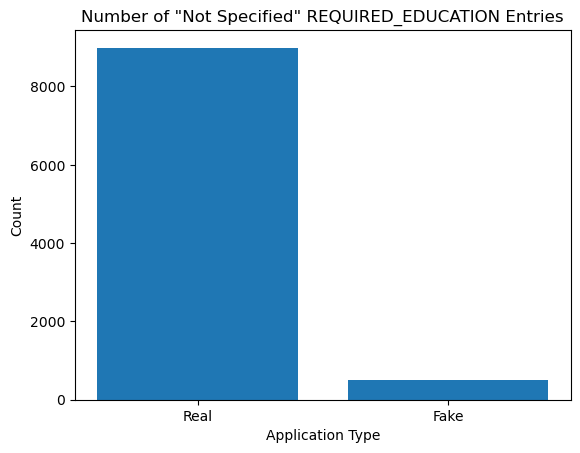



INDUSTRY
-----------------

REAL
-----------
Number of Real applications that have not specified INDUSTRY = 4628
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.272011


FAKE
-----------
Number of Fake applications that have not specified INDUSTRY = 275
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.317552


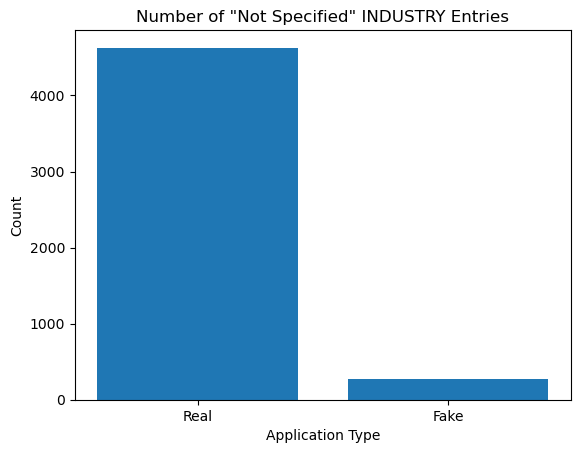



FUNCTION
-----------------

REAL
-----------
Number of Real applications that have not specified FUNCTION = 6118
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.359586


FAKE
-----------
Number of Fake applications that have not specified FUNCTION = 337
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.389145


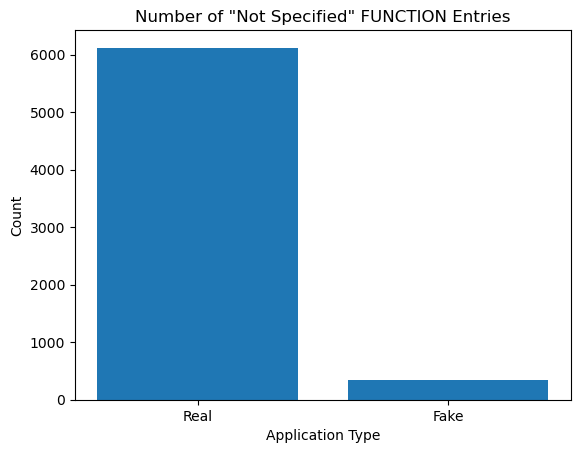



FRAUDULENT
-----------------

REAL
-----------
Number of Real applications that have not specified FRAUDULENT = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified FRAUDULENT = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


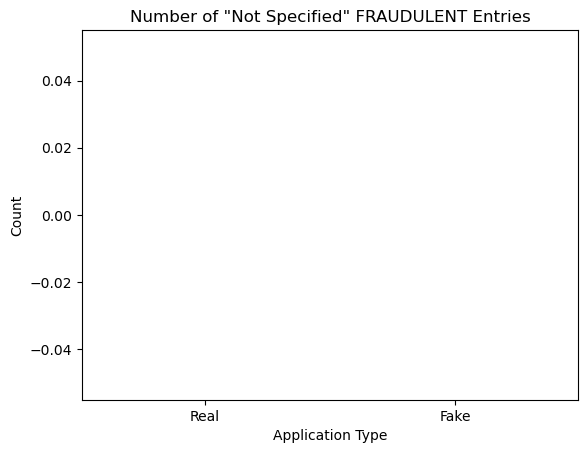

In [19]:
import matplotlib.pyplot as plt

realcount = (df['fraudulent'] == 0).sum()  # Number of real applications
fakecount = (df['fraudulent'] == 1).sum()  # Number of fake applications

# FUNCTION TO CALCULATE THE NUMBER OF NOT SPECIFIED ENTRIES IN VARIOUS ATTRIBUTES ALONG WITH THE RATIO OF NOT SPECIFIED TO REAL AND FAKE APPLICATIONS

def not_specified(labelname, name):
    df_real = df[df['fraudulent'] == 0][labelname]
    not_specreal = (df_real == 'Not Specified').sum()
    print(name + '\n-----------------\n\nREAL\n-----------')
    print(f"Number of Real applications that have not specified {name} = {not_specreal:.0f}")
    print(f"Number of Real applications = {realcount:.0f}")
    print(f"Ratio (Not Specified Real applications / Real applications) = {not_specreal / realcount:.6f}")
    
    df_fake = df[df['fraudulent'] == 1][labelname]
    not_specfake = (df_fake == 'Not Specified').sum()
    print('\n\nFAKE\n-----------')
    print(f"Number of Fake applications that have not specified {name} = {not_specfake:.0f}")
    print(f"Number of Fake applications = {fakecount:.0f}")
    print(f"Ratio (Not Specified Fake applications / Fake applications) = {not_specfake / fakecount:.6f}")

    # Create a bar chart to visualize the number of "Not Specified" entries for real and fake applications
    labels = ['Real', 'Fake']
    values = [not_specreal, not_specfake]
    
    plt.figure()
    plt.bar(labels, values)
    plt.title(f'Number of "Not Specified" {name} Entries')
    plt.xlabel('Application Type')
    plt.ylabel('Count')
    plt.show()

for column in df.columns:
    not_specified(column, column.upper())
    print('\n')


In [20]:
#FUNCTION TO RETURN THE 20 MOST FREQUENTLY OCCURING WORDS IN REAL/FAKE APPLCATIONS GIVEN THE ATTRIBUTE

#GIVEN WHETHER AN APPLICATION IS REAL OR FAKE, THE PROBABILITY OF THE WORD APPEARING IN THAT CATEGORY IS DIPLAYED

def frequent(lab,key):
    
    list_of_words = []
    if key == "real":
        f=0
        count = realcount
    else:
        f=1
        count = fakecount
    
    for i in (df1[lab].loc[df1['fraudulent']==f]):
        list_of_words.append((' '.join(dict.fromkeys(i.split()))))

    rand = ' '.join(list_of_words)
    listx = list(rand.split(" "))
    ratiolist = list(pd.Series(listx).value_counts()/count)
    _count = pd.DataFrame(pd.Series(listx).value_counts())
    _count. rename(columns = {_count.columns[0]:'Count'}, inplace = True)
    _count['Probability'] = ratiolist
    print("Frequently appearing words in " + lab + " of " + key + " applications")
    print(_count.head(20))
    list_of_words.clear()

In [21]:


def frequent(lab, key):
    list_of_words = []
    
    if key == "real":
        f = 0
        count = realcount
    else:
        f = 1
        count = fakecount
    
    for i in df[lab].loc[df['fraudulent'] == f]:
        list_of_words.append((' '.join(dict.fromkeys(i.split()))))
    
    rand = ' '.join(list_of_words)
    listx = list(rand.split(" "))
    ratiolist = list(pd.Series(listx).value_counts() / count)
    _count = pd.DataFrame(pd.Series(listx).value_counts())
    _count.rename(columns={_count.columns[0]: 'Count'}, inplace=True)
    _count['Probability'] = ratiolist
    
    print("Frequently appearing words in " + lab + " of " + key + " applications")
    print(_count.head(20))
    
    list_of_words.clear()


In [22]:
frequent('location','real')
frequent('location','fake')

Frequently appearing words in location of real applications
           Count  Probability
US,         9868     0.579993
GB,         2353     0.138298
CA,         2351     0.138180
,           2085     0.122546
NY,         1191     0.070001
London      1105     0.064947
LND,         986     0.057952
GR,          937     0.055072
San          829     0.048725
TX,          823     0.048372
New          807     0.047432
York         766     0.045022
I,           688     0.040437
Athens       568     0.033384
Francisco    498     0.029270
IL,          477     0.028036
DE,          398     0.023393
FL,          385     0.022628
IN,          380     0.022335
OH,          354     0.020806
Frequently appearing words in location of fake applications
             Count  Probability
US,            725     0.837182
CA,            155     0.178984
TX,            152     0.175520
Houston         92     0.106236
NY,             68     0.078522
,               57     0.065820
San             57     0.0

encodng

In [6]:
en = preprocessing.LabelEncoder()
#ASSIGNS NUMBER TO EVERY LABEL
for i in df.columns:
    en.fit(df[i])
    df[i]=en.transform(df[i])

In [24]:
df.head(25)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6043,2536,758,872,1548,4038,3684,3038,0,1,0,3,4,6,88,22,0
1,2183,1073,1162,872,15,6855,10491,5350,0,1,0,1,6,6,75,7,0
2,1763,1868,831,872,1393,7017,4514,3038,0,1,0,2,6,6,88,23,0
3,299,1704,1055,872,946,9211,3077,3174,0,1,0,1,5,1,22,32,0
4,975,1742,831,872,1182,5258,6540,2114,0,1,1,1,5,1,51,16,0
5,375,2085,831,872,896,5417,5852,3038,0,0,0,2,6,6,88,23,0
6,4296,216,50,296,522,14294,11219,5688,0,1,1,1,5,5,90,20,0
7,5550,1565,831,872,90,13907,3583,1402,0,1,1,2,6,6,88,23,0
8,4201,1773,831,872,1169,4973,5076,3038,0,1,1,1,0,6,58,23,0
9,2210,1384,831,872,899,9642,5472,3038,0,1,0,4,2,4,39,7,0


# Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import time

In [26]:
x=df.drop(['fraudulent'],axis=1)
y=df["fraudulent"]
x_train,x_test,y_train,y_test = (train_test_split(x, y, test_size=0.25, shuffle=True))

In [34]:
x_test

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
12505,6319,266,831,872,436,12264,11210,5411,0,1,0,2,6,6,88,23
5574,269,2161,831,872,1440,967,6594,3038,0,0,0,1,6,6,0,32
1306,4577,2305,831,872,868,6487,8146,4141,0,1,1,1,1,1,51,17
5568,2199,2613,831,872,899,9534,5458,3038,0,1,0,1,2,4,51,7
1935,4273,2876,831,872,91,2611,6675,3038,0,1,0,1,5,5,89,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,595,625,831,872,374,472,1305,1000,0,1,0,1,5,6,90,12
2876,1482,296,230,872,896,2258,10821,4057,0,0,1,2,6,6,88,23
9326,951,1488,831,872,896,7578,4654,3038,0,0,0,0,6,6,58,18
12337,10042,1083,637,734,606,13370,9327,3988,0,1,1,1,6,1,58,18


In [27]:
def traintest(model,modelname):
    
    start = time.time()
    print("\n------------------\nMODEL - "+ modelname + "\n-----------------\n")

    #Training the model
    model.fit(x_train, y_train) 

    #Predicting 
    y_pred = model.predict(x_test)

    #Calculating the accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy = " + '{:.2f}%'.format(accuracy*100))
    #Calculating the precision
    precision = metrics.precision_score(y_test, y_pred)
    print("Precision = " + '{:.2f}%'.format(precision*100))

    #Total Time
    end = time.time() - start
    print("Time = " + '{:.2f}s'.format(end))

In [28]:
#ACCURACY ALONG WITH THE TIME IS NOTED 

import warnings
warnings.filterwarnings('ignore')  

traintest(GaussianNB(),"NAIVE BAYES")
traintest(DecisionTreeClassifier(),"DECISION TREE")
traintest(RandomForestClassifier(),"RANDOM FOREST")
traintest(KNeighborsClassifier(),"KNN")
traintest(SVC(),"SVM")
traintest(LogisticRegression(solver='liblinear'),"LOGISITC REGRESSION")


------------------
MODEL - NAIVE BAYES
-----------------

Accuracy = 93.65%
Precision = 34.76%
Time = 0.05s

------------------
MODEL - DECISION TREE
-----------------

Accuracy = 96.47%
Precision = 64.94%
Time = 0.20s

------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 98.01%
Precision = 97.26%
Time = 2.67s

------------------
MODEL - KNN
-----------------

Accuracy = 95.26%
Precision = 56.52%
Time = 5.23s

------------------
MODEL - SVM
-----------------

Accuracy = 94.92%
Precision = 0.00%
Time = 6.38s

------------------
MODEL - LOGISITC REGRESSION
-----------------

Accuracy = 95.15%
Precision = 75.00%
Time = 0.64s



 Final Model


In [29]:
traintest(RandomForestClassifier(),"RANDOM FOREST")


------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 98.10%
Precision = 97.33%
Time = 2.63s
